# Creating Customer Market Segments

### Unsupervised Learning

*Import the necessary libraries*

In [342]:
#Data handling Imports
import pandas as pd 
import numpy as np

#Visualisation Imports
import seaborn as sns
import pylab
pylab.style.use('seaborn-pastel')
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

#Calculation Imports
import math
import random


#Outlier Handling Imports
from scipy.stats.mstats import winsorize

#Normalization & Scaler Imports
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from scipy.stats import boxcox, probplot, norm, shapiro
from sklearn.decomposition import PCA

#Encoding Imports
from sklearn.preprocessing import LabelEncoder

#Clustering Imports
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans
import scipy.cluster.hierarchy as shc
from sklearn import cluster
from sklearn import preprocessing
import plotly.express as px
from sklearn.datasets import make_blobs
plt.style.use('dark_background')

#Notebook arrange Imports
import warnings
warnings.filterwarnings('ignore')

# PART I: 

## Exploratory Data Analysis (EDA)

*Load the "Wholesale Data" dataset*

In [343]:
# Load the dataset
df = pd.read_csv("Wholesale_Data.csv")
df.shape

(440, 8)

*Perform basic data exploration:*

In [344]:
display(df.head(10))

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [345]:
# Display complete information of the data frame
print('Showing Meta Data :')
display(df.info())

Showing Meta Data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


None

In [346]:
# Display a brief description of the overall dataset
print('Descriptive Statastics of our Data:')
display(df.describe().T)

Descriptive Statastics of our Data:


,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [347]:
#Checking for missing values
print('Missing values of our Data:')
display(df.isnull().sum())
# pd.isnull(df).sum()

Missing values of our Data:


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

*Univariate*

We are going to start exploring our data with the Univariate analysis (each feature individually), before carrying the Bivariate analysis and compare pairs of features to find correlation between them.

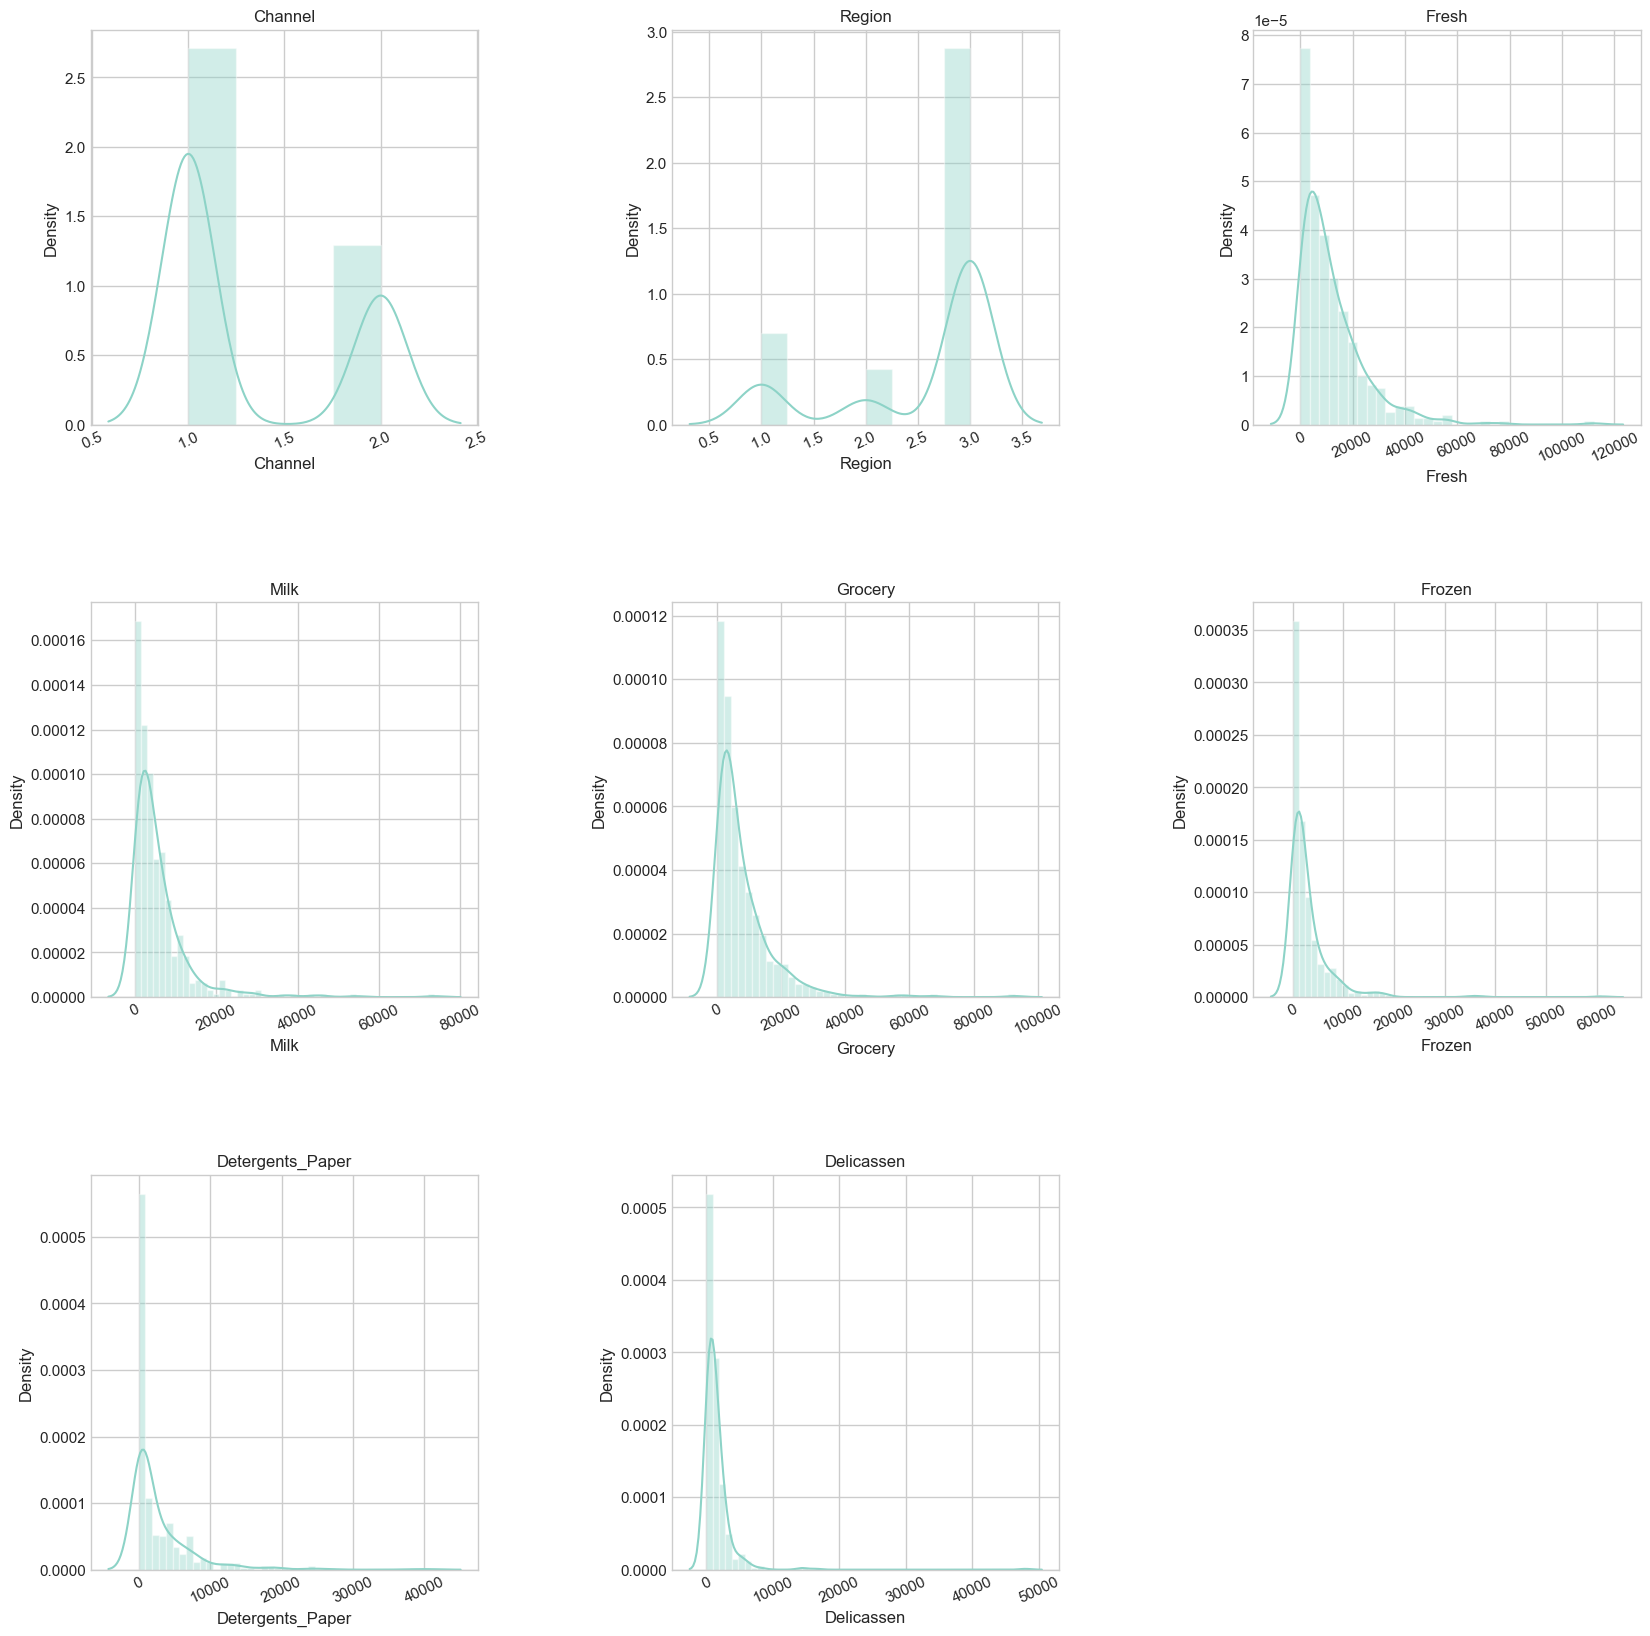

In [348]:
def plot_distribution(df, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(df.shape[1]) / cols)
    for i, column in enumerate(df.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if df.dtypes[column] == object:
            g = sns.countplot(y=column, data=df)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(df[column])
            plt.xticks(rotation=25)
    
plot_distribution(df, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

From the graphs on the distribution of product it seems that we have some outliers in the data, let's have a closer look before we decide what to do:

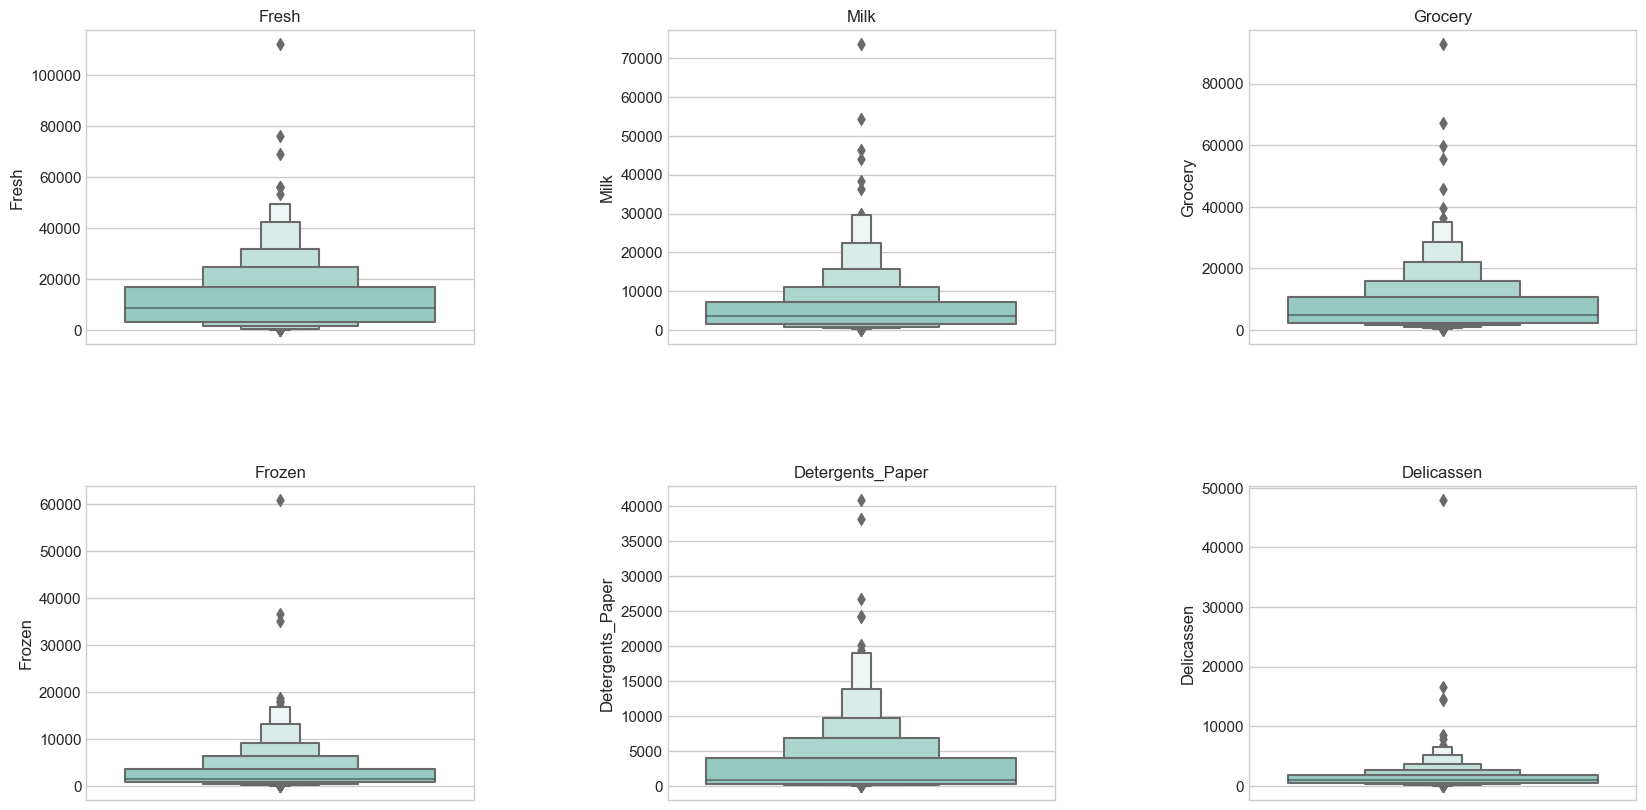

In [349]:
# Let’s remove the categorical columns:
df2 = df[df.columns[+2:df.columns.size]]

def plot_distribution(df2, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(df2.shape[1]) / cols)
    for i, column in enumerate(df2.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        g = sns.boxenplot(y=df2[column])  # Use boxenplot for the distribution
        plt.xticks(rotation=25)

# Example usage with df2
plot_distribution(df2, cols=3, width=20, height=10, hspace=0.45, wspace=0.5)

*Outliers* 

From the visualization outliers have been detected. It will be removed as PCA is sensitive to noise which the outliers will generate.

*Bivariate*

Let's use Seaborn pairplot to have a first look at how our data is interracting

*Comparative Pair Plot Analysis*

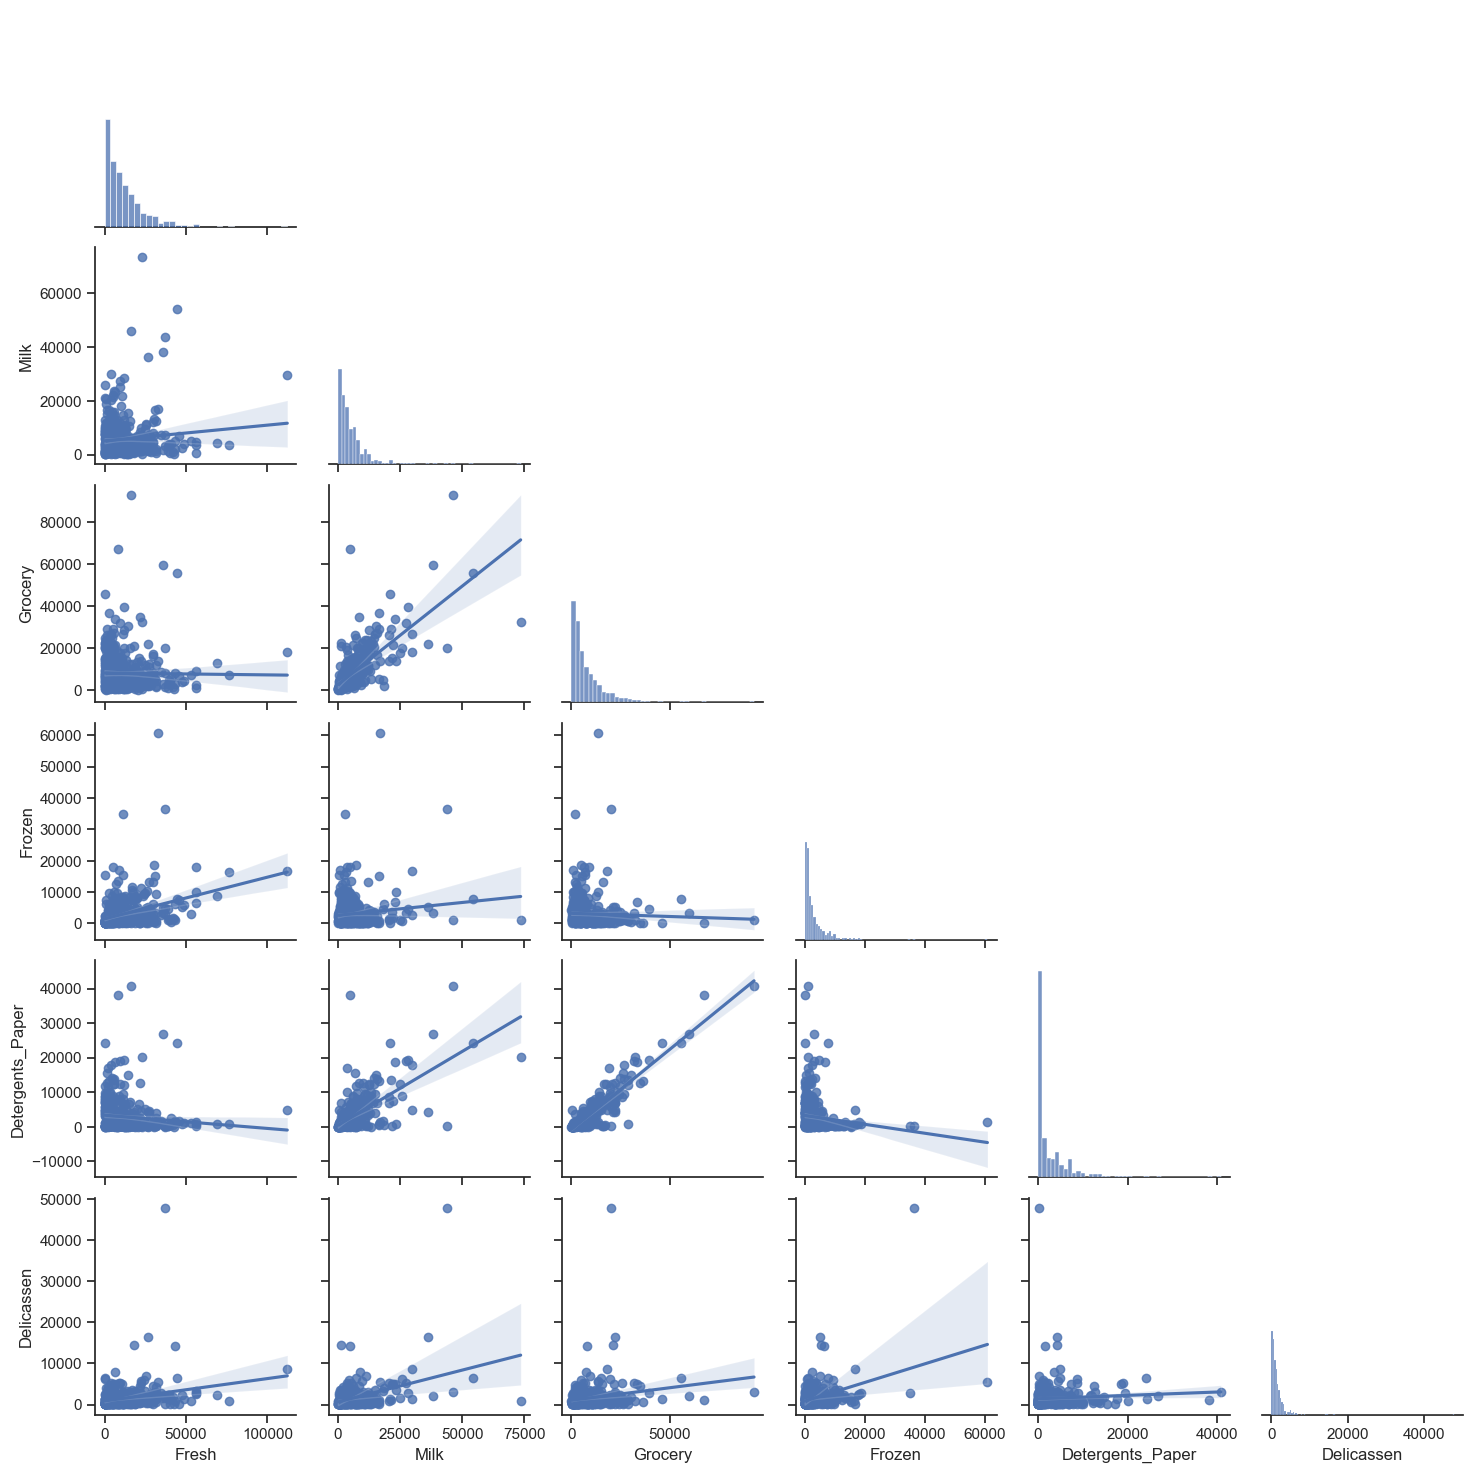

In [350]:
sns.set(style="ticks")
g = sns.pairplot(df2,corner=True,kind='reg')
g.fig.set_size_inches(15,15)

*Observation*

From the pairplot above, the correlation between the "*detergents and paper products*" and the "*grocery products*" seems to be pretty strong, meaning that consumers would often spend money on these two types of product. Let's look at the Pearson correlation coefficient to confirm this:

*Correlation Matrix of Features:*

Text(0.5, 1.0, 'Pearson correlation')

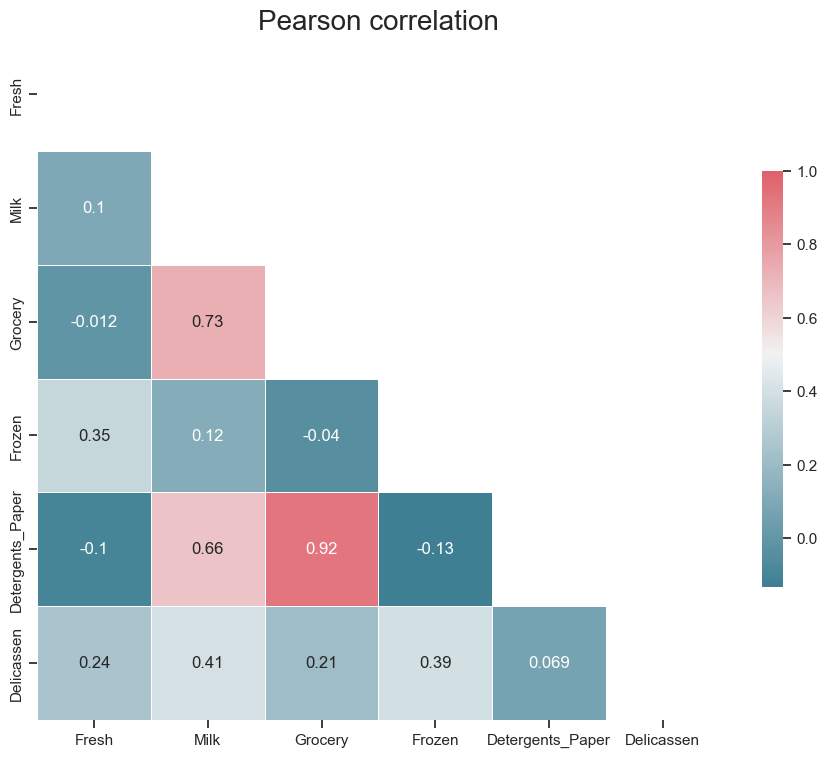

In [351]:
# Compute the correlation matrix
corr = df2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .6},annot=True)

plt.title("Pearson correlation", fontsize =20)

In a Classification or Regression problem we would have explored this r of 0.92 but we'll skip this now to jump into the clustering

*Observations*

- From the above visualization we could clearly see that the data is not normally distributed  for any of the features. Most of the data for all the features lies near zero and is heavily right skewed. Also from the boxplot we could see that there are many outliers for each of the features. Moreover the range of values for each of the features vary a lot.

 - From the correlation heatmap we could see that
    * 'Detergents_Paper' and 'Grocery' has strong correlation (0.92)
    * 'Milk' and 'Grocery' has strong correlation (0.73)
    * 'Detergents_Paper' and 'Milk' has strong correlation (0.66)

 - The feature 'Milk' has a strong correlation with two other features and could have been easily predicted. But there are even more stronger correlations that essentially brings down the feature 'Milk' a little low in the order.
 
 - From the visualizations it is very clear that the data is not normally distributed. All the features are skewed to the right and most of the data values are centered near zero.

In [352]:
# Select three indices of your choice you wish to sample from the dataset
indices = [22,154,398]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(df2.loc[indices], columns=df2.keys()).reset_index(drop=True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,31276,1917,4469,9408,2381,4334
1,622,55,137,75,7,8
2,11442,1032,582,5390,74,247


## SUMMARY ON EDA: 

For the purposes of this project, the features `'Channel'` and `'Region'`
were excluded in the analysis — with focus instead on the six product
categories recorded for customers.

This summary provides insights from exploratory data analysis (EDA) on a dataset.
Below are the key findings and observations:

**Missing Values:**

1. There are no missing values in the dataset.

**Data Distribution:**

2. The attributes (Fresh, Milk, Grocery, and Delicatessen) exhibit significant
   differences between their mean and median values, indicating skewed data.
   None of the attributes follow a normal distribution.

3. The data attributes are highly skewed with long positive tails,
   suggesting that most of the data is centered near zero.

**Outliers:**

4. Outliers have been detected visually and are set to be removed
   from the dataset. This is because Principal Component Analysis
   (PCA) is sensitive to noise that outliers can introduce.

**Pair Plot:**
5. The pair plot revealed a strong correlation between "Detergents
   and Paper products" and "Grocery products," indicating that consumers
   often spend money on these two types of products.
   This correlation will be further examined.

**Heat Maps:**

6. Correlation heatmaps highlighted the following strong correlations:
   - "Detergents_Paper" and "Grocery" with a correlation of 0.92.
   - "Milk" and "Grocery" with a correlation of 0.73.
   - "Detergents_Paper" and "Milk" with a correlation of 0.66.

7. The feature "Milk" exhibits strong correlations with other features,
   suggesting that it could be predicted based on these features.
   However, even stronger correlations exist among other features,
   affecting the importance of "Milk" as a predictor.

8. Overall, the visualizations show that the data is not normally
   distributed, with all features skewed to the right, and data
   values concentrated near zero.

These findings provide valuable insights into the dataset's characteristics
and will guide further data preprocessing and analysis, including the
application of PCA and clustering techniques.



## Data Preprocessing

In this section, we will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

*Implementation: Feature Scaling*

 A simpler approach, which is be applying the natural logarithm.

In the code block below, the following will be implemented:

 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

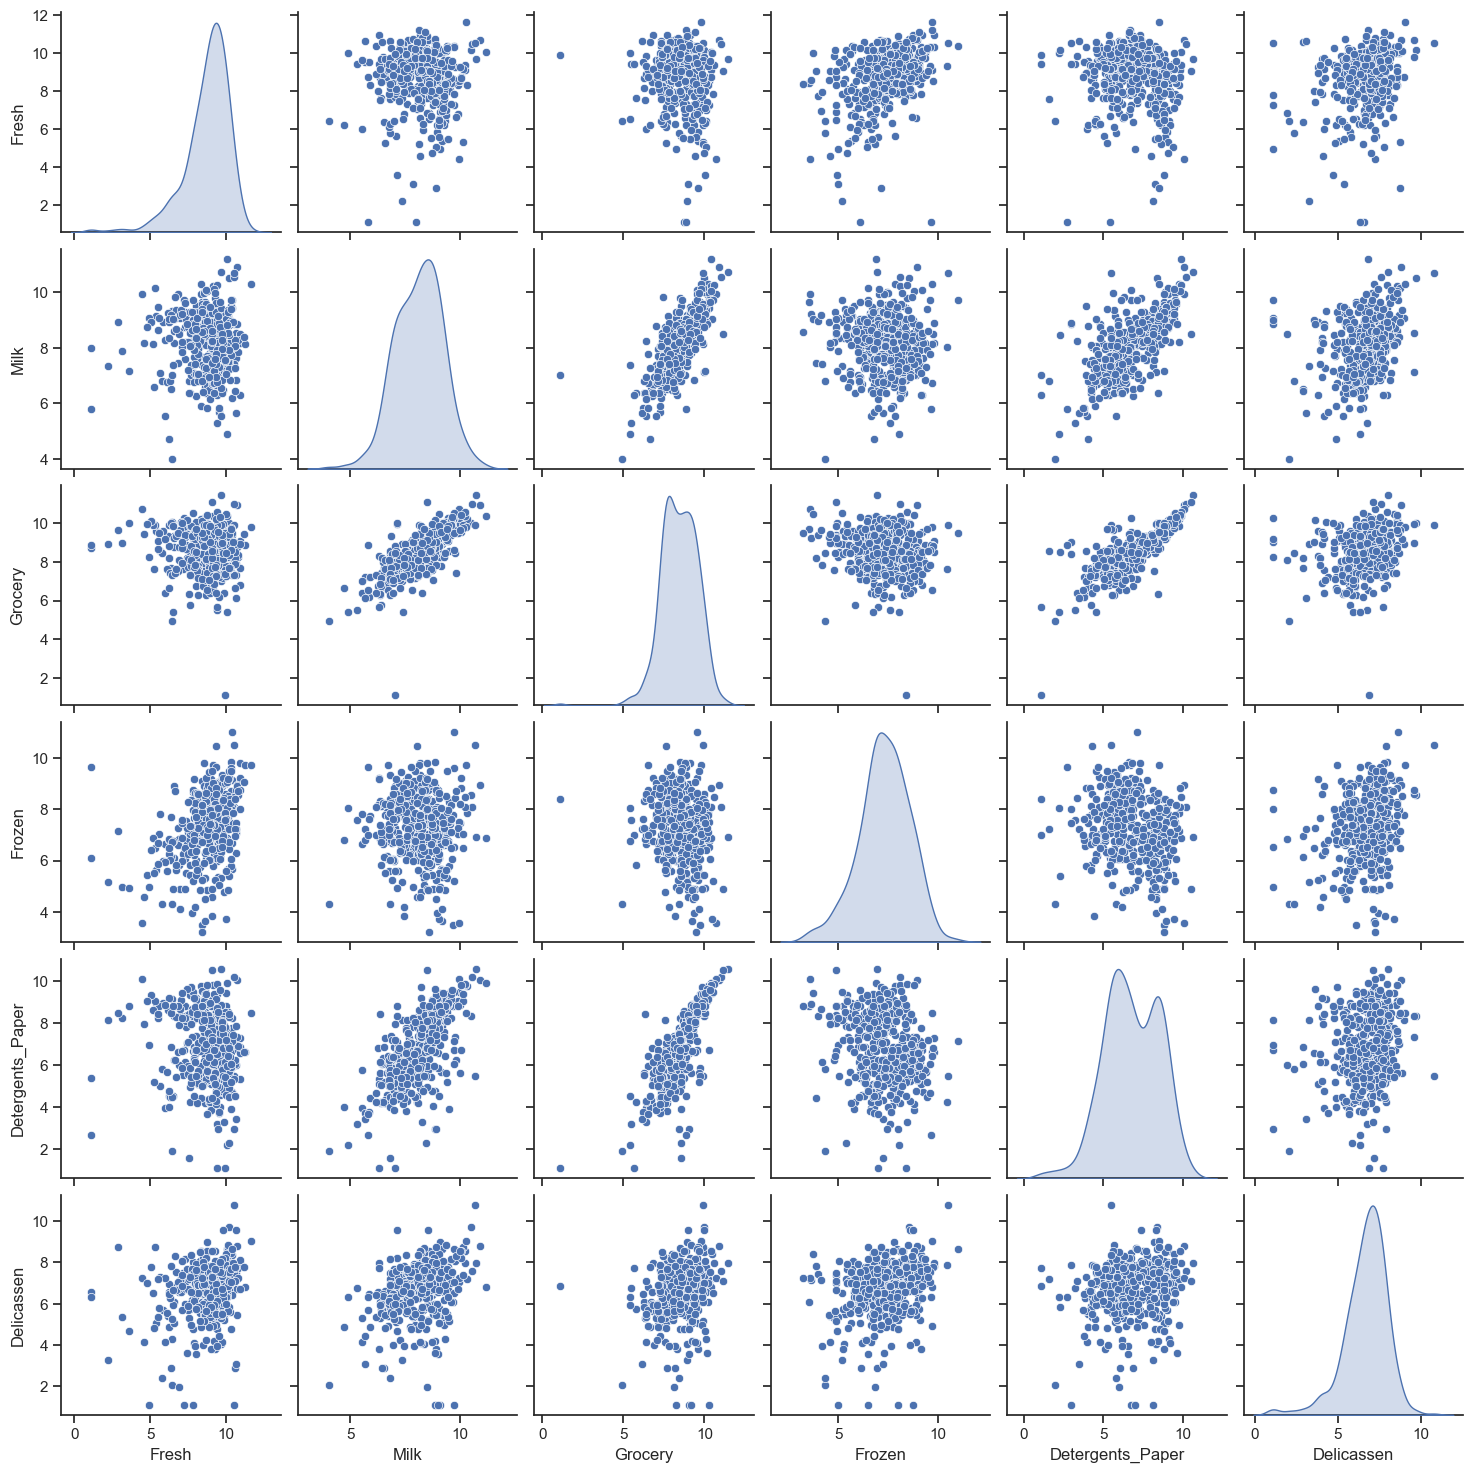

In [353]:
# Scale the data using the natural logarithm
log_data = np.log(df2[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].copy())

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
_ = sns.pairplot(log_data, diag_kind = 'kde')

*Observation*

After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [354]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,10.350606,7.558517,8.404920,9.149316,7.775276,8.374246
1,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
2,9.345046,6.939254,6.366470,8.592301,4.304065,5.509388


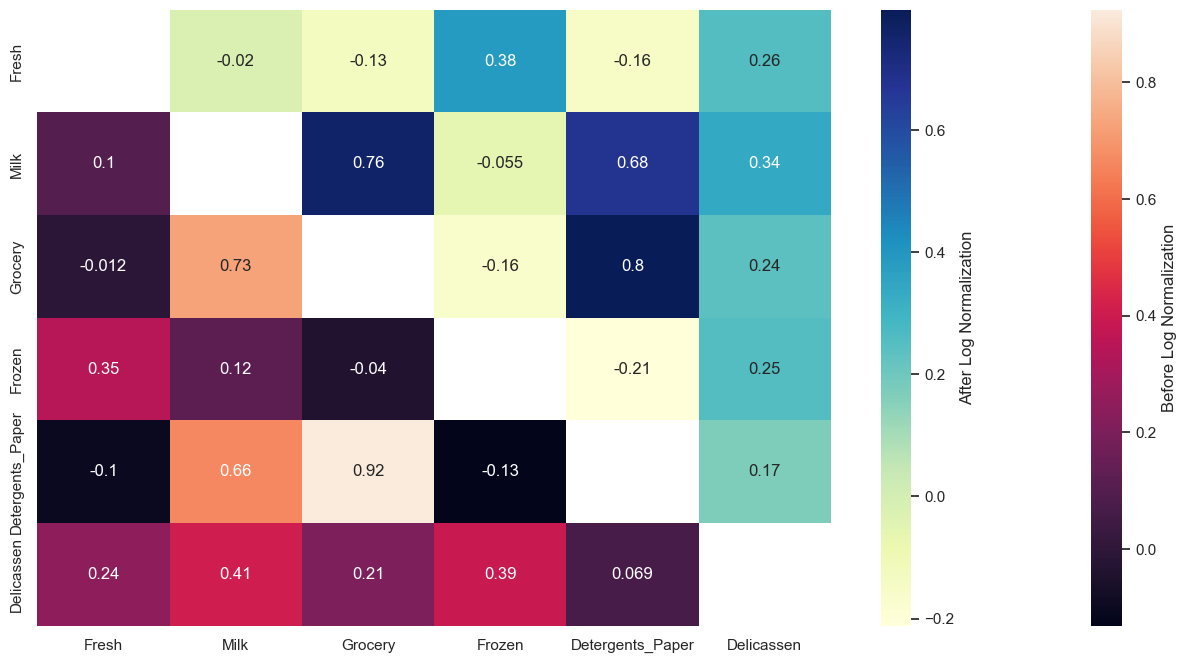

In [355]:
# Display the correlation heatmap
log_corr = log_data.corr()

f = plt.figure(figsize = (16,8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax1 = sns.heatmap(corr, annot=True, mask=mask, cbar_kws={'label': 'Before Log Normalization'})

mask2 = np.zeros_like(corr)
mask2[np.tril_indices_from(mask2)] = True
with sns.axes_style("white"):
    ax2 = sns.heatmap(log_corr, annot=True, mask=mask2, cmap="YlGnBu", cbar_kws={'label': 'After Log Normalization'})

*Outlier Detection*

Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. 

An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

*NOTE:* 

Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [356]:
# The shape of dataset before removing the outliers

%pip install termcolor
from termcolor import colored
print(f"Shape of Dataset: {colored(log_data.shape, 'yellow')}")

Note: you may need to restart the kernel to use updated packages.
Shape of Dataset: (440, 6)


In [357]:
# df2.columns

In [358]:
outliers_list = []
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    outliers = list(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.values)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outliers_list.extend(outliers)
    
print("List of Outliers -> {}".format(outliers_list))
duplicate_outliers_list = list(set([x for x in outliers_list if outliers_list.count(x) >= 2]))
duplicate_outliers_list.sort()
print("\nList of Common Outliers -> {}".format(duplicate_outliers_list))

# Select the indices for data points you wish to remove
outliers  = duplicate_outliers_list

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

# Display dataset after outliers were removed
print(f"Shape of Dataset: {colored(good_data.shape, 'yellow')}")

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicassen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


List of Outliers -> [65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154, 38, 57, 65, 145, 175, 264, 325, 420, 429, 439, 75, 161, 66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]

List of Common Outliers -> [65, 66, 75, 128, 154]
Shape of Dataset: (435, 6)


**Observation:**

- There are 5 data points that are considered outliers for more than one feature based on the above analysis.
- As these data points are considered outliers for multiple features we could remove them.
- The above 5 data points that were outliers for more than one feature were removed from the data set so that we do not build a clustering model on the skewed data. 

We clearly know that clustering algorithms are sensitive to noisy data and outliers. 


*Data Transformation*

In [359]:
scaler = preprocessing.StandardScaler()

X = good_data

scaler.fit(X)

data_scaled = scaler.fit_transform(X)


# data_scaled = scaler.fit_transform(good_data)

# pd.DataFrame(data_scaled).describe()

In [360]:
data_scaled

array([[ 0.47854001,  0.9861265 ,  0.45030197, -1.55497301,  0.64917792,
         0.4005845 ],
       [ 0.06690464,  1.00102992,  0.67560551,  0.1187718 ,  0.77292717,
         0.62540519],
       [-0.00702655,  0.89954829,  0.46574528,  0.36575763,  0.8118693 ,
         1.80464205],
       ...,
       [ 0.57500616,  1.4311592 ,  1.77698875, -0.98815496,  1.66771664,
         0.6650754 ],
       [ 0.33222548, -0.50581572, -0.71736947, -0.30132887, -0.99549496,
         0.76783606],
       [-0.5866704 , -0.65100962, -0.60502937, -2.50098773, -0.3753016 ,
        -2.17773165]])

In [361]:
 pd.DataFrame(data_scaled).describe().T

,count,mean,std,min,25%,50%,75%,max
0,435.0,-1.347581e-16,1.001151,-5.394358,-0.487713,0.203144,0.682688,2.012620
1,435.0,-1.470088e-16,1.001151,-3.211749,-0.719200,0.065663,0.705484,2.897873
2,435.0,4.736952e-16,1.001151,-2.943561,-0.750524,0.006830,0.779527,2.849782
3,435.0,-7.472949e-16,1.001151,-3.259578,-0.537931,0.012374,0.677023,2.931020
4,435.0,5.717011e-16,1.001151,-3.387800,-0.735989,-0.058407,0.878768,2.269128
5,435.0,-2.776834e-16,1.001151,-4.442416,-0.535513,0.142781,0.647229,3.241798


In [362]:
# Import libraries for Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Remove column Milk
new_data = df2.drop('Milk',axis=1)

In [363]:
# Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, df2['Milk'], test_size=0.25, random_state=1)

# Create a decision tree regressor and fit it to the training set
regressor =  DecisionTreeRegressor(random_state=1)
regressor.fit(X_train, y_train)

# Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print(score)

0.5158499438066617


*Interpretation*

As you can see, we attempted to predict Milk using the other features in the dataset and the score ended up being 0.515. At this initial stage we might say that this feature is somewhat difficult to predict because the score is around the halfway point of possible scores. Remember that R^2 goes from 0 to 1. This might indicate that it could be an important feature to consider.

## SUMMARY ON DATA PREPROCESSING

In the data preprocessing phase, several important steps were taken:

**Feature Scaling:**
1. Natural logarithm scaling was applied to the data, which transformed the distribution of each feature to appear more normal. This step helps in reducing the impact of outliers and makes the data more suitable for certain algorithms.

2. The goal of this feature scaling was to make the data more amenable for clustering algorithms. The effect of scaling on correlated features was observed, and it was assessed whether the correlations between features were still present, stronger, or weaker after the scaling.

**Outlier Detection:**
3. Outlier detection was conducted to identify data points that were considered outliers based on the analysis. There were five data points that were considered outliers for multiple features.

4. To address the issue of outliers and the impact of noisy data on clustering algorithms, the five data points that were outliers for more than one feature were removed from the dataset.

The decision to remove these outliers is critical for building a robust clustering model, as clustering algorithms are indeed sensitive to noisy data and outliers. This preprocessing step sets the stage for more reliable and meaningful cluster analysis.

## PART II - KMeans Clustering


# Clustering

*K-Means Clustering*
Our dataset isn't that big so we can implement a K-Means clustering model here instead of using a hierarchical clustering model.

### The Elbow Method
Let's find the optimal number of clusters by using the Elbow method

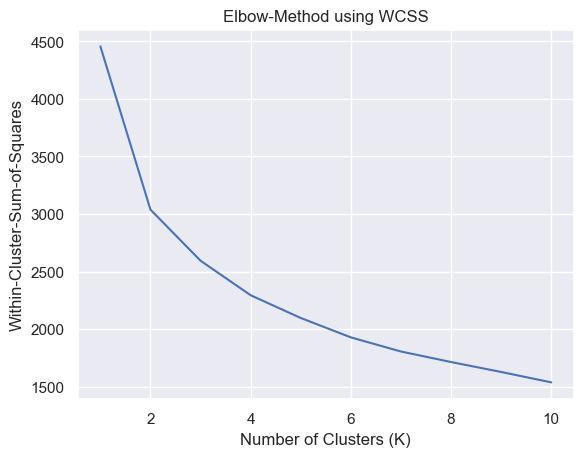

In [364]:
sns.set()
from sklearn.cluster import KMeans
PCA_train = PCA(2).fit_transform(data_scaled)
ps = pd.DataFrame(PCA_train)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)

    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow-Method using WCSS')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster-Sum-of-Squares')
plt.show()

In [365]:
kmeans = KMeans(n_clusters = 6,
                init = 'k-means++',
                max_iter = 300,
                n_init=10,
                random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [366]:
df_cluster = good_data
df_cluster['Cluster'] = y_kmeans
df_cluster.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,2
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,2
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,2
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,4
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,4


In [367]:
df_cluster.Cluster.value_counts()

Cluster
3    109
2    101
4     84
1     61
0     41
5     39
Name: count, dtype: int64

*Interpretation & Summary*

The code is calling the `value_counts()` function on a DataFrame named `df_cluster`, specifically on a column named 'Cluster.' This function is used to count the occurrences of unique values in the specified column. Here's an explanation of the result:

- **Cluster 3**: Appears 109 times in the 'Cluster' column. This means that there are 109 data points assigned to Cluster 3.

- **Cluster 2**: Appears 101 times in the 'Cluster' column. There are 101 data points assigned to Cluster 2.

- **Cluster 4**: Appears 84 times in the 'Cluster' column. There are 84 data points assigned to Cluster 4.

- **Cluster 1**: Appears 61 times in the 'Cluster' column. There are 61 data points assigned to Cluster 1.

- **Cluster 0**: Appears 41 times in the 'Cluster' column. There are 41 data points assigned to Cluster 0.

- **Cluster 5**: Appears 39 times in the 'Cluster' column. There are 39 data points assigned to Cluster 5.

The result indicates the distribution of data points among different clusters after performing a clustering analysis. It shows the number of data points assigned to each of the 6 clusters (labeled from 0 to 5). Cluster 3 has the highest number of data points (109), followed by Cluster 2 (101), and so on. This information is valuable for understanding the size and distribution of clusters in your data and can help guide further analysis or decision-making based on the segmentation achieved through clustering.

*Aplying PCA*

In [368]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pc = pca.fit_transform(X)
pc_df = pd.DataFrame(pc)
pc_df.columns = ['pc1','pc2']

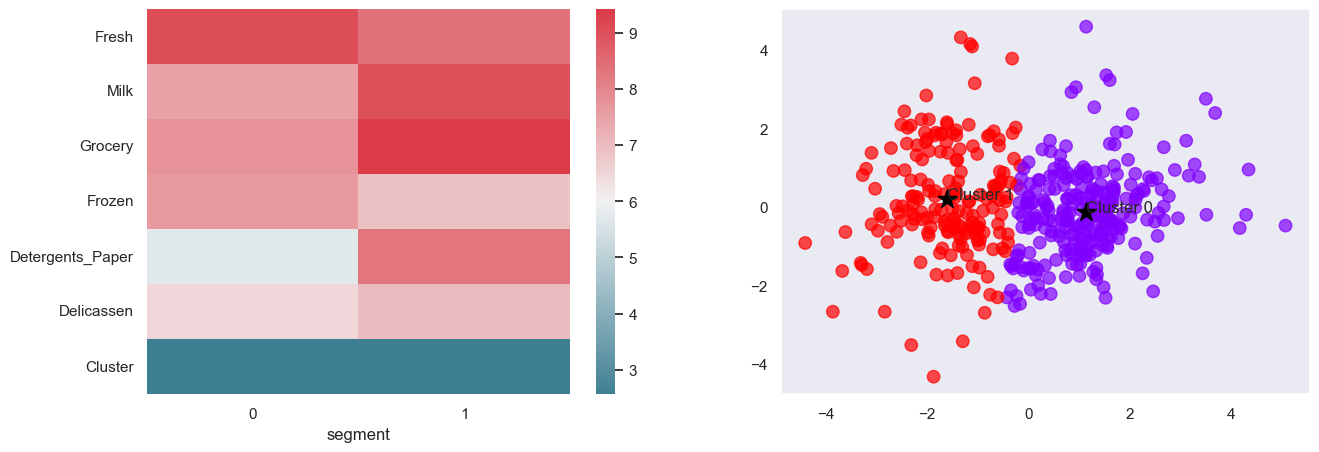

In [369]:
# Let's parallely plot the heatmap and scatter plot to see the segmentation
# Cluster=2
kmeans = KMeans(n_clusters=2, random_state=123).fit(ps)
y_kmeans = kmeans.predict(ps)
df = good_data.assign(segment=kmeans.labels_)  # Add the 'segment' column to good_data
kmeans_3_means = df.groupby('segment').mean()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.heatmap(kmeans_3_means.T, cmap=cmap)

plt.subplot(1, 2, 2)
plt.scatter(ps[0], ps[1], c=y_kmeans, s=80, cmap='rainbow', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', color='black', s=200)

# Adding cluster labels as annotations
for i, label in enumerate(kmeans.cluster_centers_):
    plt.annotate(f'Cluster {i}', (label[0], label[1]), fontsize=12)

plt.grid()
plt.show()

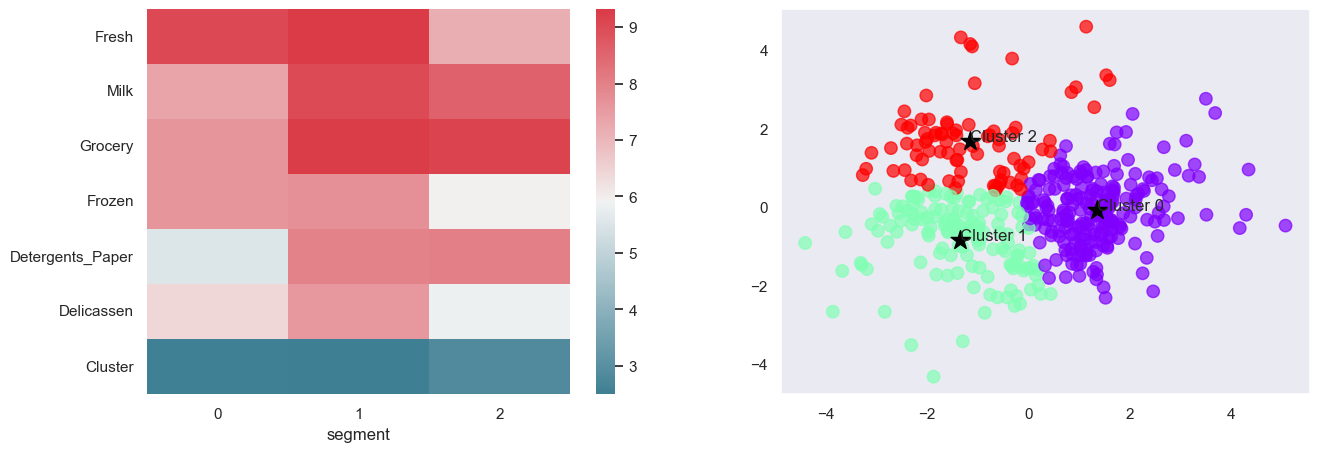

In [370]:
# Let's parallely plot the heatmap and scatter plot to see the segmentation
# Cluster=3
kmeans = KMeans(n_clusters=3, random_state=123).fit(ps)
y_kmeans = kmeans.predict(ps)
df = good_data.assign(segment=kmeans.labels_)  # Add the 'segment' column to good_data
kmeans_3_means = df.groupby('segment').mean()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.heatmap(kmeans_3_means.T, cmap=cmap)

plt.subplot(1, 2, 2)
plt.scatter(ps[0], ps[1], c=y_kmeans, s=80, cmap='rainbow', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', color='black', s=200)

# Adding cluster labels as annotations
for i, label in enumerate(kmeans.cluster_centers_):
    plt.annotate(f'Cluster {i}', (label[0], label[1]), fontsize=12)

plt.grid()
plt.show()


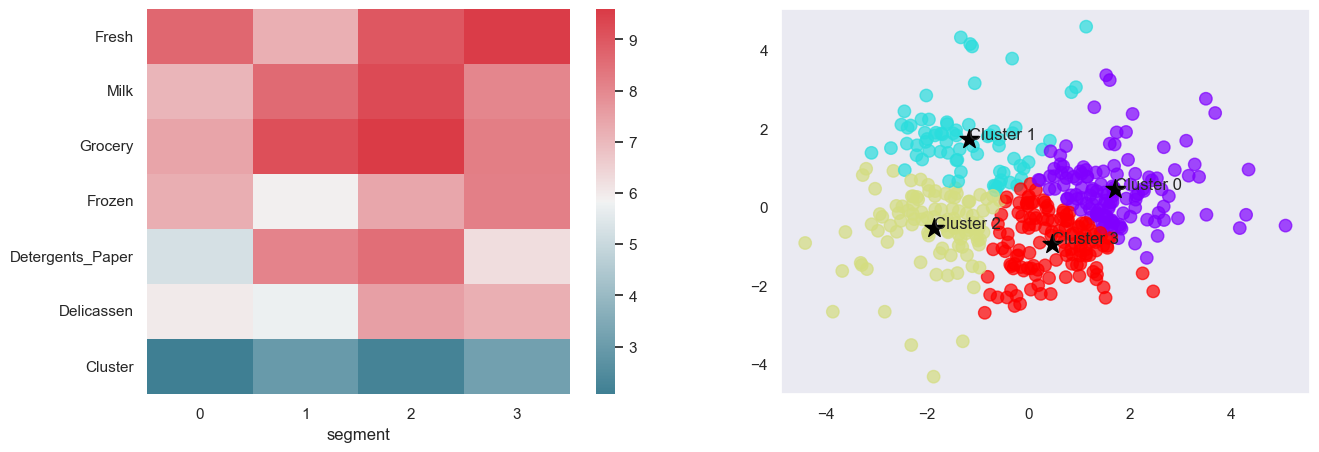

In [371]:
# Let's parallely plot the heatmap and scatter plot to see the segmentation
# Cluster=4
kmeans = KMeans(n_clusters=4, random_state=123).fit(ps)
y_kmeans = kmeans.predict(ps)
df = good_data.assign(segment=kmeans.labels_)  # Add the 'segment' column to good_data
kmeans_3_means = df.groupby('segment').mean()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.heatmap(kmeans_3_means.T, cmap=cmap)

plt.subplot(1, 2, 2)
plt.scatter(ps[0], ps[1], c=y_kmeans, s=80, cmap='rainbow', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', color='black', s=200)

# Adding cluster labels as annotations
for i, label in enumerate(kmeans.cluster_centers_):
    plt.annotate(f'Cluster {i}', (label[0], label[1]), fontsize=12)

plt.grid()
plt.show()

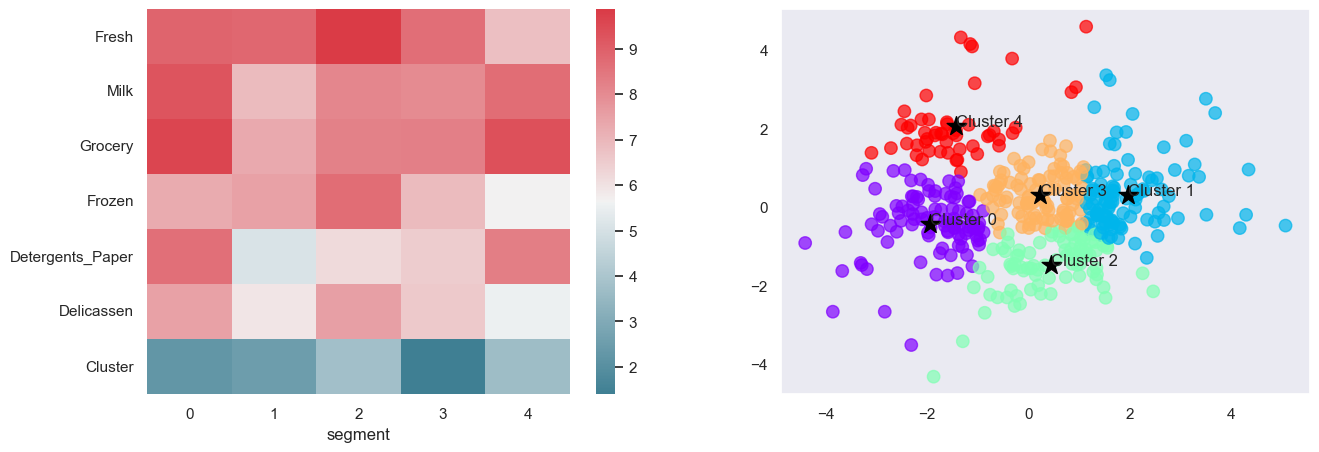

In [372]:
#Let's parallely plot the heatmap and scatter plot to see the segmentation
#Cluster=5
kmeans = KMeans(n_clusters=5, random_state=123).fit(ps)
y_kmeans = kmeans.predict(ps)
df = good_data.assign(segment=kmeans.labels_)  # Add the 'segment' column to good_data
kmeans_3_means = df.groupby('segment').mean()


plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.heatmap(kmeans_3_means.T, cmap=cmap)

plt.subplot(1,2,2)
plt.scatter(ps[0], ps[1],c = y_kmeans, s=80, cmap='rainbow',alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], marker = '*', color='black', s=200)

# Adding cluster labels as annotations
for i, label in enumerate(kmeans.cluster_centers_):
    plt.annotate(f'Cluster {i}', (label[0], label[1]), fontsize=12)

plt.grid()
plt.show()


Let's try other kind of clustering.

## Implementation Hierarchical Clustering

### Plotting DendoGrams: 

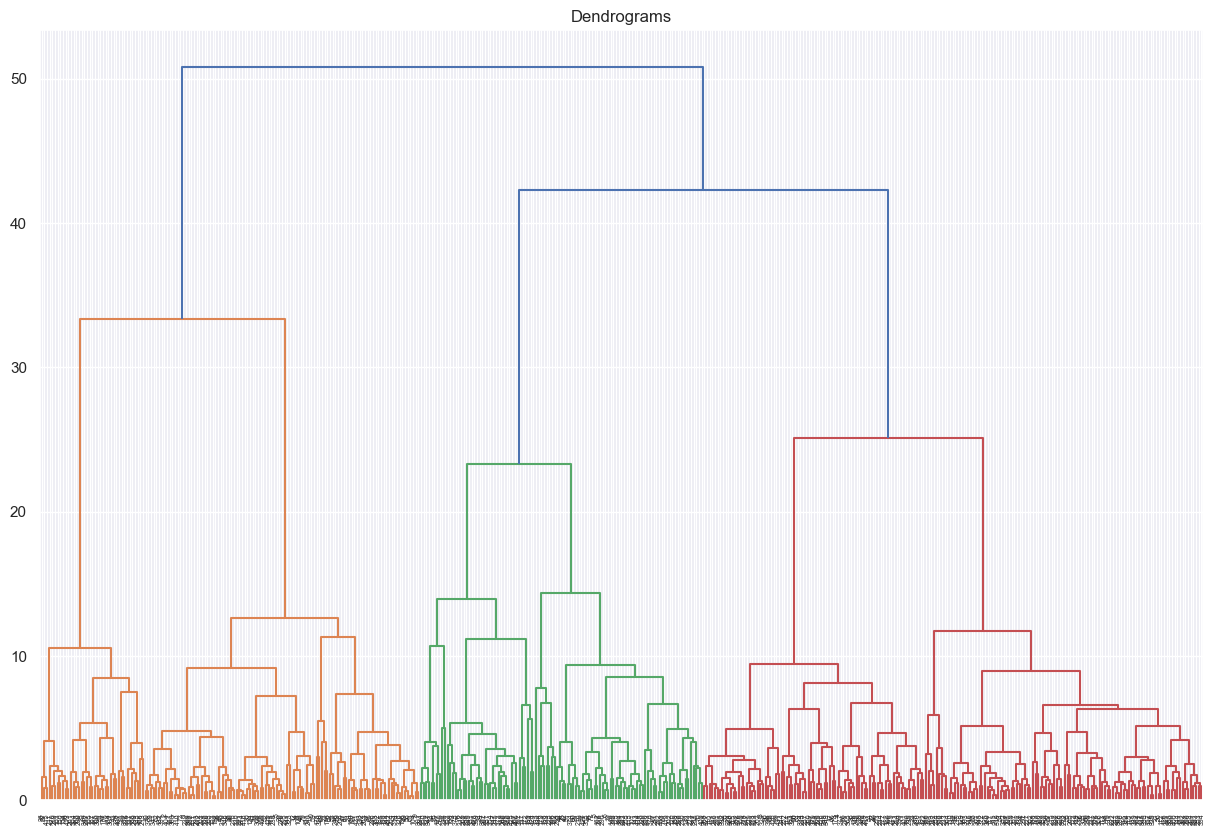

In [373]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(good_data, method='ward'))

*Interpretation & Summary*

The provided code generates a dendrogram, which is a visual representation of hierarchical clustering using the Ward linkage method. Here's the interpretation and summary of the output:

1. **Dendrogram Structure**: The dendrogram is a tree-like structure where each data point starts as a leaf at the bottom of the diagram. The vertical lines represent data points.

2. **Hierarchical Clustering**: The dendrogram displays how data points are grouped into clusters. Starting from the bottom, data points are successively merged into clusters as you move up the dendrogram.

3. **Height**: The vertical lines are connected by horizontal lines at varying heights. The height at which two lines or clusters merge represents the level of similarity (or distance) at which those clusters were combined. The vertical lines can be seen as the leaves of the tree, and the horizontal lines represent the hierarchy of clusters.

4. **Determination of Clusters**: By analyzing the dendrogram, you can determine the optimal number of clusters for your data. The number of clusters is usually chosen based on where you draw a horizontal line that cuts across the dendrogram. The number of clusters is equal to the number of vertical lines intersected by the horizontal line.

In summary, the dendrogram provides a visual representation of the hierarchical clustering process, showing how data points are merged into clusters based on their similarity. 

### Plotting Dendogram Cutt-Off 

X axis depicts data points and Y axis represents the distance between these samples. We can see tha the vertical line with maximum distance is the blue line, which helps us to decide a threshold of 6 and cut the dendrogram:

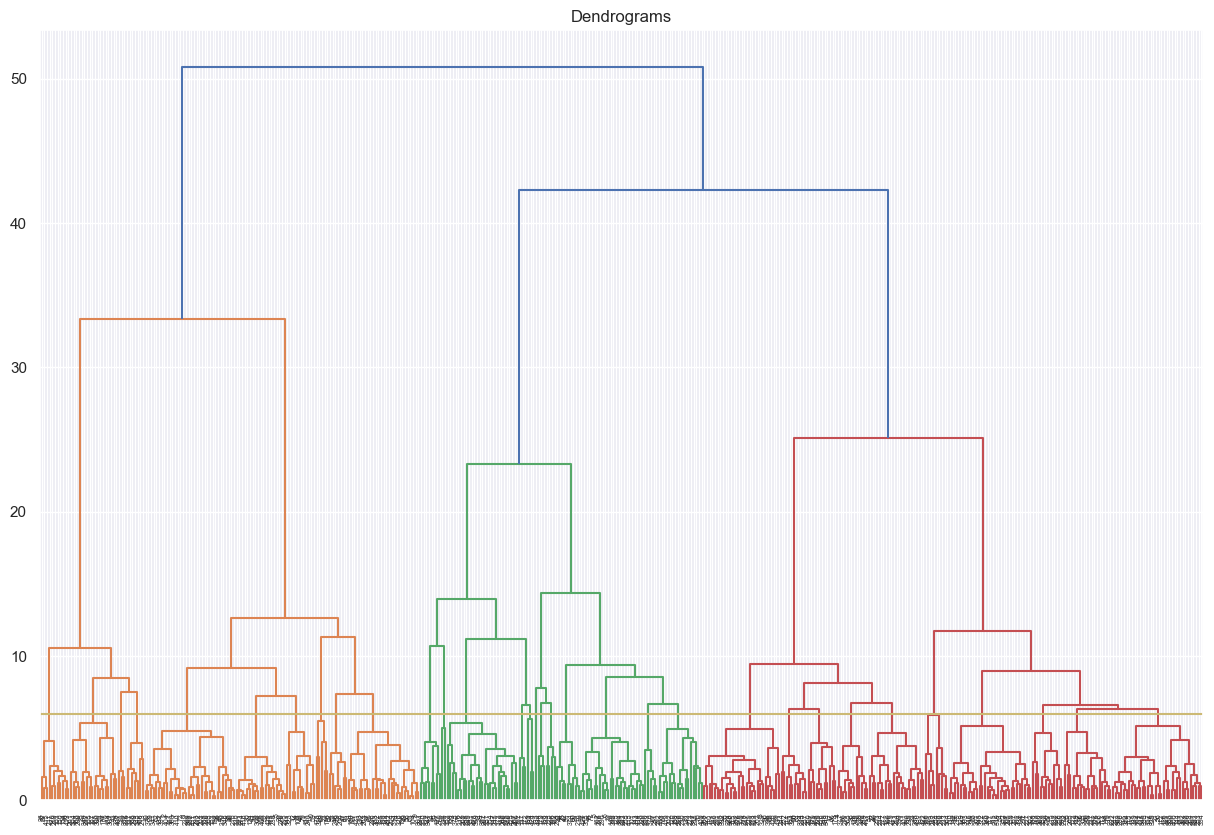

In [374]:
plt.figure(figsize=(15, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(good_data, method='ward'))
plt.axhline(y=6, color='y', linestyle='-')

*Summary*

The dendrogram provides insights into how the data points are grouped together at different levels of similarity or dissimilarity.

Here's the interpretation and summary of the output:

1. Dendrogram Structure: The dendrogram displays a tree structure, with data points at the leaves (bottom) and clusters formed by merging points at various levels.

2. Vertical Lines: Each vertical line in the dendrogram represents a data point. The height at which a data point's line merges with other lines or clusters reflects the level of similarity at which those points were combined.

3. Horizontal Lines: The horizontal lines in the dendrogram connect clusters of data points as they are merged. The height at which horizontal lines connect reflects the distance or dissimilarity at which the merging occurred.

4. Yellow Horizontal Line: The yellow horizontal line, created with `plt.axhline`, is drawn at a height of 6 units on the dendrogram. This line serves as a threshold or cutoff point for determining the number of clusters. Clusters that are formed below this line are considered as distinct clusters, while those formed above it may be considered as subclusters or a single larger cluster.

In summary, the dendrogram visually represents the process of hierarchical clustering and helps in determining the number of clusters by identifying the height at which distinct clusters are formed. By looking at where the yellow line intersects the dendrogram, you can make decisions about the appropriate number of clusters based on the level of similarity or dissimilarity that you want to consider.

### Let's CLuster Our Data  Using Agglomerative Clustering: 

In [375]:
from sklearn.cluster import AgglomerativeClustering

agg_clu = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
agg_clu.fit_predict(good_data)

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,

*Interpretation & Summary*

With the code, hierarchical clustering was performed on a dataset using the AgglomerativeClustering algorithm with two clusters. Here's a summary of the results:

- Two Clusters: The algorithm has divided the data into two distinct clusters, labeled as 0 and 1.

- Cluster 0: This cluster contains data points that share similar characteristics, and they have been grouped together based on the chosen distance metric (Euclidean) and linkage method (Ward's method). Data points in this cluster are more similar to each other than to data points in Cluster 1.

- Cluster 1: This cluster comprises data points that are different from those in Cluster 0. They have their own distinct characteristics or patterns, and the algorithm has grouped them into a separate cluster.

Hierarchical clustering is a method that starts with individual data points and progressively combines them into clusters based on their similarity. The choice of linkage method and distance metric influences the structure of the resulting clusters.

Ultimately, hierarchical clustering helps identify natural groupings or patterns within the data, which can be valuable for various data analysis tasks.

# PART IV

### Principal Component Analysis (PCA)

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, we will implement the following:
 - Importing `sklearn.decomposition.PCA` and assigning the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Applying a PCA transformation of `log_samples` using `pca.transform`, and assigning the results to `pca_samples`.

In [376]:
def pca_results(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

In [377]:
# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6, random_state=0)
pca.fit(good_data)

# Check if 'Cluster' is in log_samples before trying to drop it
if 'Cluster' in log_samples.columns:
    log_samples.drop('Cluster', axis=1, inplace=True)
    pca_samples = pca.transform(log_samples)

# The following lines are for checking the explained variance
print("Explained Variance Ratio => {}\n".format(pca.explained_variance_ratio_))
print("Explained Variance Ratio (cumsum) => {}\n".format(pca.explained_variance_ratio_.cumsum()))

Explained Variance Ratio => [0.37084888 0.24418561 0.14524786 0.10028337 0.08219989 0.04036798]

Explained Variance Ratio (cumsum) => [0.37084888 0.61503449 0.76028235 0.86056572 0.9427656  0.98313358]



,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
Dimension 1,0.3708,0.1582,-0.4026,-0.4390,0.1670,-0.7510,-0.1581,-0.0565
Dimension 2,0.2442,-0.5715,-0.1187,-0.0500,-0.4873,-0.0083,-0.4343,-0.4803
Dimension 3,0.1452,-0.5136,-0.1255,-0.0320,-0.0242,-0.0533,-0.1737,0.8281
Dimension 4,0.1003,-0.5727,0.0691,-0.0237,0.2151,-0.2333,0.7245,-0.2024
Dimension 5,0.0822,-0.2359,0.0517,0.0542,0.8273,0.1799,-0.4306,-0.1909
Dimension 6,0.0404,-0.0012,0.7115,0.3602,-0.0481,-0.5612,-0.2126,0.0389


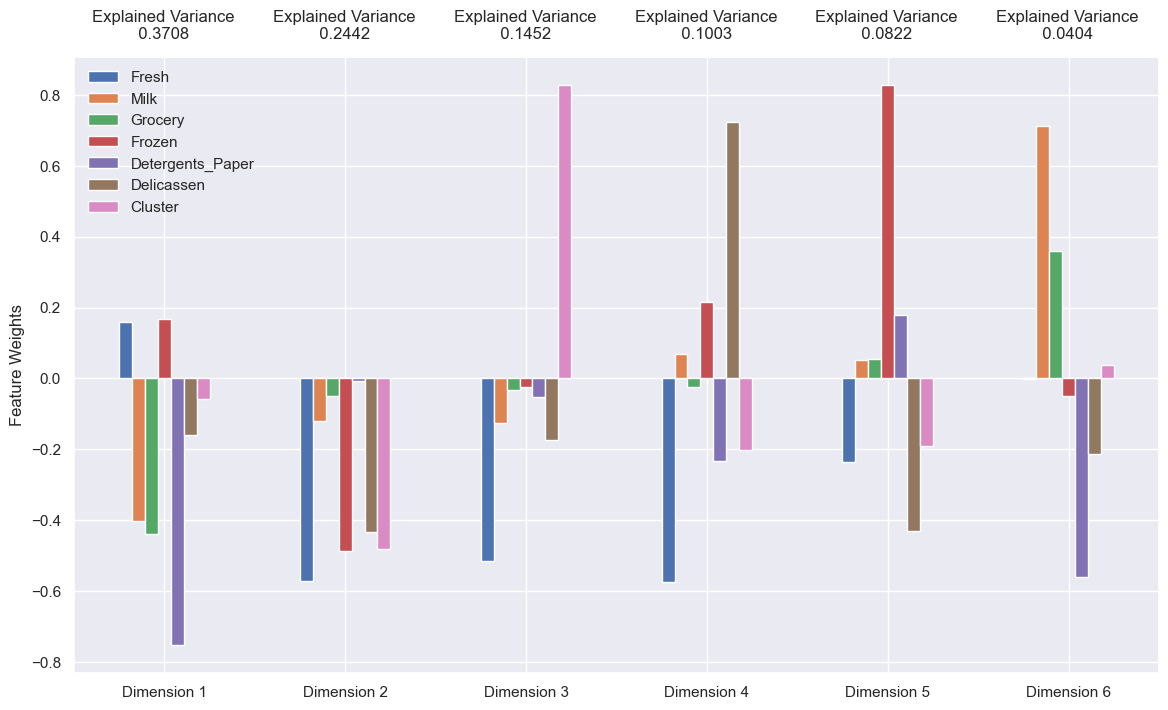

In [378]:
# Generate PCA results plot
pca_results = pca_results(good_data, pca)
pca_results

*Interpretation ans Summary*

The code above provided erforms Principal Component Analysis (PCA) on the `good_data` and then presents the results in a tabular form and visualized as bar plots. Here's the interpretation and summary of the output:

1. **Explained Variance**: This section shows the explained variance for each principal component (Dimension). Explained variance represents the proportion of the total variance in the data that is explained by each dimension. For example, in Dimension 1, it explains approximately 37.08% of the total variance.

2. **Feature Weights**: The table presents the weights (loadings) of each feature (e.g., Fresh, Milk, Grocery, etc.) for each principal component. These weights indicate the contribution of each feature to the respective dimension. Negative weights suggest an inverse relationship, while positive weights indicate a positive relationship.

3. **Interpretation of Principal Components**:
   - Dimension 1: This dimension has a high positive weight on 'Grocery' and 'Detergents_Paper,' which suggests that Dimension 1 is primarily influenced by spending on these product categories. It also has a negative correlation with 'Milk,' 'Fresh,' and 'Frozen.'
   - Dimension 2: This dimension has a high negative weight on 'Milk,' 'Grocery,' and 'Detergents_Paper.' It indicates that Dimension 2 captures variation associated with lower spending on these product categories.
   - Dimension 3: Dimension 3 is primarily influenced by 'Delicassen' and has a strong negative correlation with 'Milk' and 'Grocery.'
   - Dimension 4: This dimension has a positive weight on 'Frozen' and 'Delicassen' and a negative weight on 'Milk' and 'Detergents_Paper.'
   - Dimension 5: Dimension 5 is strongly positively influenced by 'Frozen' and 'Milk.'
   - Dimension 6: Dimension 6 is mainly influenced by 'Milk' and 'Delicassen' and negatively by 'Detergents_Paper.'

In summary, PCA results in a set of dimensions, each capturing different aspects of the data's variance. You can use these dimensions to reduce the dimensionality of your data or to understand which features contribute most to the variance in the dataset. The table and bar plots provide a clear representation of how each feature contributes to these dimensions.


In [379]:
# Display sample log-data after having a PCA transformation applied
# display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

*Interpretation & Summary*

After running the code above we see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. This is consistent with the initial interpretation of the sample points.

### Dimensionality Reduction
When using PCA, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, we will implement the following:
 - Assigning the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Applying a PCA transformation of `good_data` using `pca.transform`, and assigning the results to `reduced_data`.
 - Applying a PCA transformation of `log_samples` using `pca.transform`, and assigning the results to `pca_samples`.

In [380]:
def pca_results2(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
    #components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

,Dimension 1,Dimension 2
0,-1.757983,0.009711
1,-1.788665,-0.812251
2,-1.883353,-1.599135
3,1.155265,-1.405201
4,-0.784786,-2.394294


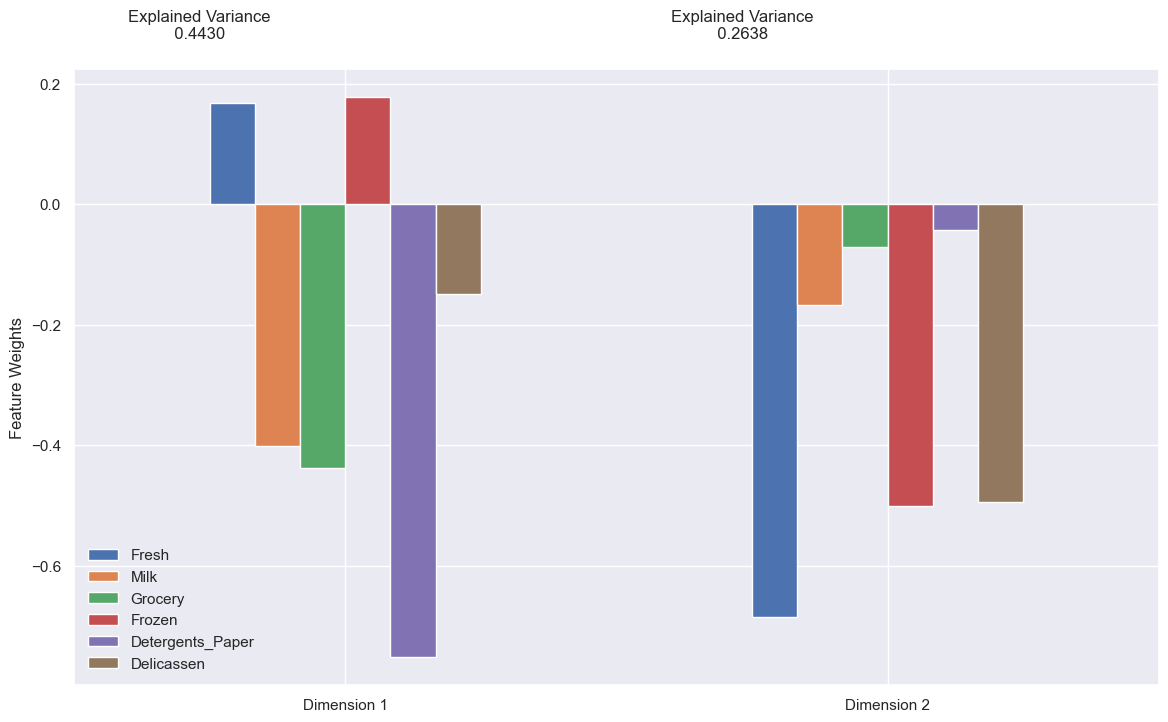

In [381]:
#import visuals as vs

# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
#pca.fit(X)
pca.fit(good_data.drop('Cluster', axis=1))

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data.drop('Cluster', axis=1))


pca_results2(good_data.drop('Cluster', axis=1), pca)


# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
reduced_data.head()


*Interpreatation & Summary*

The result above represents the data after applying Principal Component Analysis (PCA) to reduce the original feature space to two dimensions, often referred to as "Dimension 1" and "Dimension 2." Each row in this result corresponds to a data point from your dataset, and the values in "Dimension 1" and "Dimension 2" represent the coordinates of that data point in the new two-dimensional space created by PCA.

Here's an explanation of the result for the first few data points:

- **Dimension 1**:
    - Data Point 0: -1.757983
    - Data Point 1: -1.788665
    - Data Point 2: -1.883353
    - Data Point 3: 1.155265
    - Data Point 4: -0.784786

- **Dimension 2**:
    - Data Point 0: 0.009711
    - Data Point 1: -0.812251
    - Data Point 2: -1.599135
    - Data Point 3: -1.405201
    - Data Point 4: -2.394294

Interpreting these results:

- The values in "Dimension 1" represent the position of each data point along the first principal component. This component captures the direction in the data that explains the most variance. Therefore, differences in values along "Dimension 1" indicate how much each data point varies along this primary axis.

- The values in "Dimension 2" represent the position of each data point along the second principal component. This component explains the second most variance in the data.

- The specific values in each dimension indicate how much a data point has been projected onto these principal components. For example, Data Point 0 has a lower value in "Dimension 1" and a small positive value in "Dimension 2," which means it lies in a certain position in this two-dimensional space.

- Negative and positive values in these dimensions indicate the direction and extent of deviation from the centroid or mean of the data.

These reduced dimensions allow for simpler data visualization, clustering, and analysis. Different data points in this new space have been positioned based on their contributions to the principal components, which capture the most significant patterns and variances in the original data.

In summary, you have applied PCA to reduce the dimensionality of the data to two dimensions, allowing you to represent the data in a more compact form while retaining important patterns and variability. The `reduced_data` DataFrame contains the transformed values of each data point in this new space, making it easier to work with and visualize the data.

In [382]:
# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.1419,-2.7722
1,6.6170,6.5320
2,3.7698,0.0071


*Interpretation & Summary*

The result you provided represents the transformed values of your sample log-data points after applying the PCA transformation. These sample log-data points have been projected onto the first two principal components ("Dimension 1" and "Dimension 2") that were derived from your original data. Here's an explanation of the result for each sample:

- **Sample 0**:
    - **Dimension 1**: -0.1419
    - **Dimension 2**: -2.7722

- **Sample 1**:
    - **Dimension 1**: 6.6170
    - **Dimension 2**: 6.5320

- **Sample 2**:
    - **Dimension 1**: 3.7698
    - **Dimension 2**: 0.0071

Interpreting these results:

- **Dimension 1**: The values in "Dimension 1" indicate the position of each sample along the first principal component. Sample 0 has a negative value, Sample 1 has a very high positive value, and Sample 2 has a moderately positive value in "Dimension 1." This suggests that the samples differ significantly in terms of the primary source of variation captured by "Dimension 1."

- **Dimension 2**: The values in "Dimension 2" indicate the position of each sample along the second principal component. Sample 0 has a negative value, Sample 1 has a high positive value, and Sample 2 has a very small positive value in "Dimension 2." This suggests that the samples also vary significantly in terms of the second source of variation captured by "Dimension 2."

In summary, the transformed values in "Dimension 1" and "Dimension 2" represent the position of each sample in the two-dimensional space created by PCA. The large variation in these values for your samples indicates that the samples have distinct positions in this new space, suggesting they are diverse in terms of how they contribute to the primary sources of variation represented by these dimensions. This transformation simplifies the data and allows for easier analysis and visualization while retaining the most significant patterns.

## Visualizing with a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

The code below produces a biplot of the reduced-dimension data.

In [383]:
def biplot(good_data, reduced_data, pca):
    '''
    Produce a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.
    
    good_data: original data, before transformation.
               Needs to be a pandas dataframe with valid column names
    reduced_data: the reduced data (the first two dimensions are plotted)
    pca: pca object that contains the components_ attribute

    return: a matplotlib AxesSubplot object (for any additional customization)
    
    '''

    fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

<Axes: title={'center': 'PC plane with original feature projections.'}, xlabel='Dimension 1', ylabel='Dimension 2'>

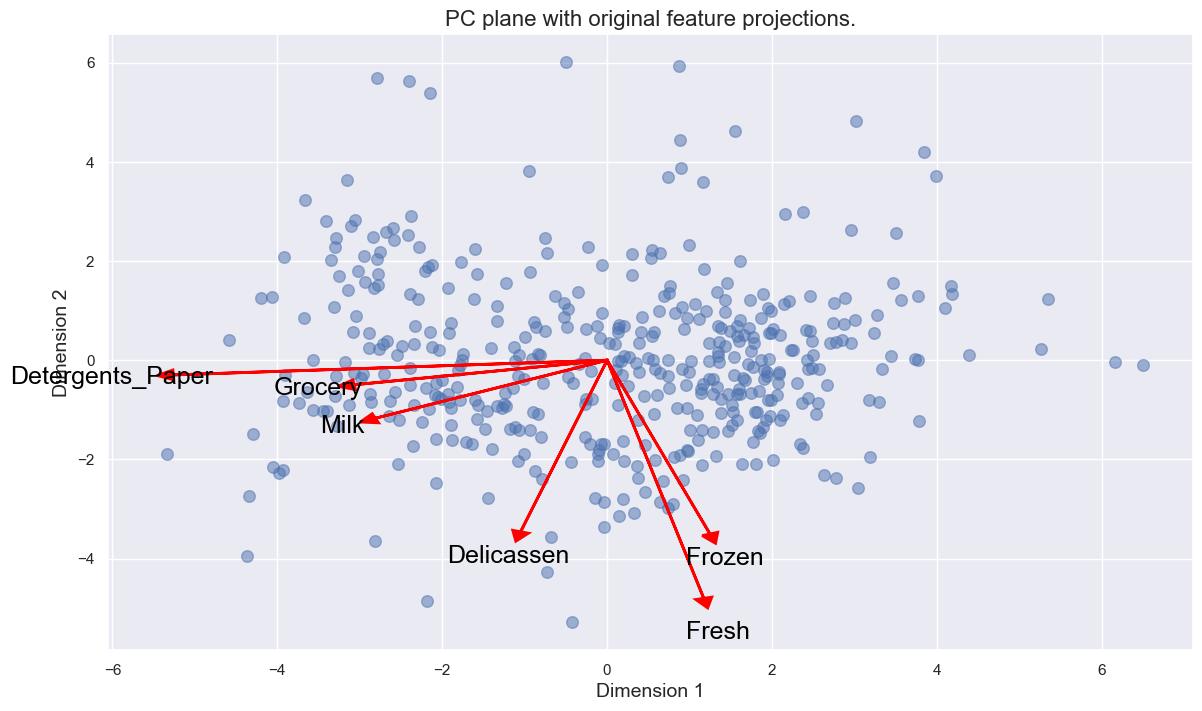

In [384]:
# Create a biplot
biplot(good_data, reduced_data, pca)

*Interpretation & Summary*

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the above visualization we can see that for `Dimension 1` 'Detergents_Paper', 'Grocery' and 'Milk' are strongly correlated on the negative side. For the `Dimension 2`, 'Fresh', 'Frozen' and 'Delicatessen' are strongly correlated on the negative direction.